%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("Ecommerce_Sales_Prediction_Dataset.csv")
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


In [8]:
df.isnull().sum()

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.dtypes

Date                datetime64[ns]
Product_Category            object
Price                      float64
Discount                   float64
Customer_Segment            object
Marketing_Spend            float64
Units_Sold                   int64
dtype: object

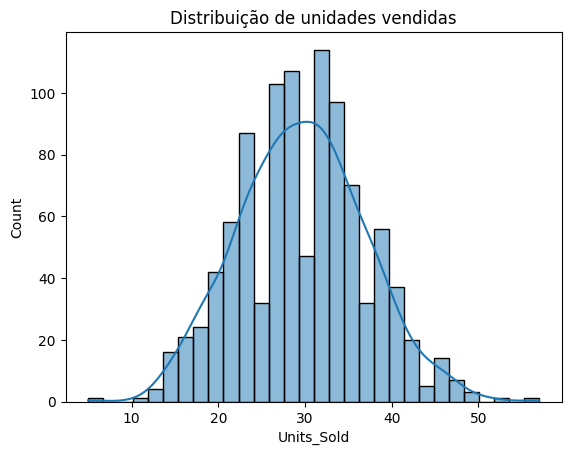

In [10]:
sns.histplot(df['Units_Sold'], bins=30, kde=True)
plt.title('Distribuição de unidades vendidas')
plt.show()

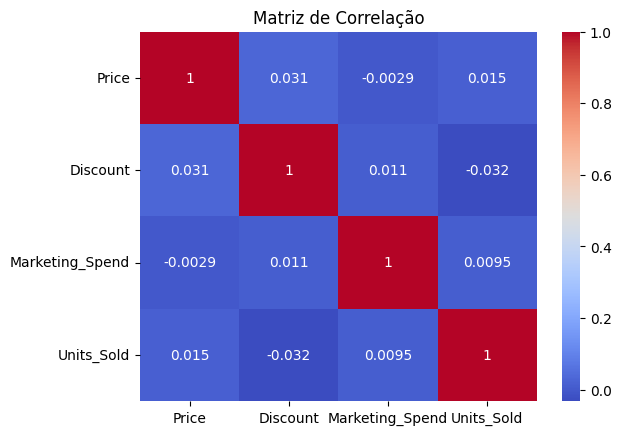

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

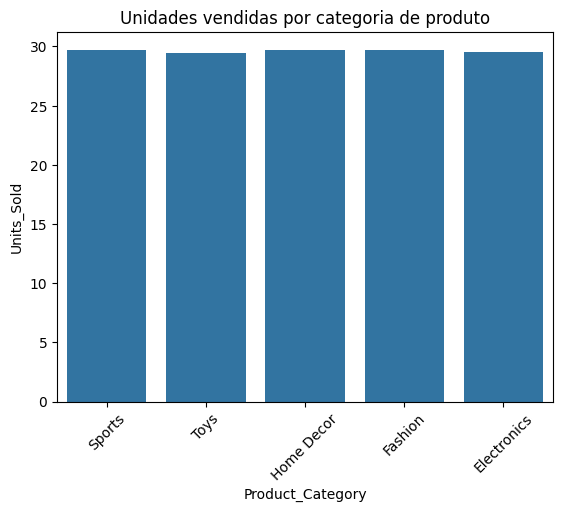

In [12]:
sns.barplot(x='Product_Category', y='Units_Sold', data=df, ci=None)
plt.title('Unidades vendidas por categoria de produto')
plt.xticks(rotation=45)
plt.show()

In [13]:
df['recept'] = df['Units_Sold'] * df['Price']
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,recept
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,29849.60
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,9111.68
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,18891.36
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,26774.83
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,12072.89


In [14]:
x = df[['Price', 'Discount', 'Marketing_Spend']]
y = df['Units_Sold']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 54.630263322939534
R-squared: -0.010104478153374785


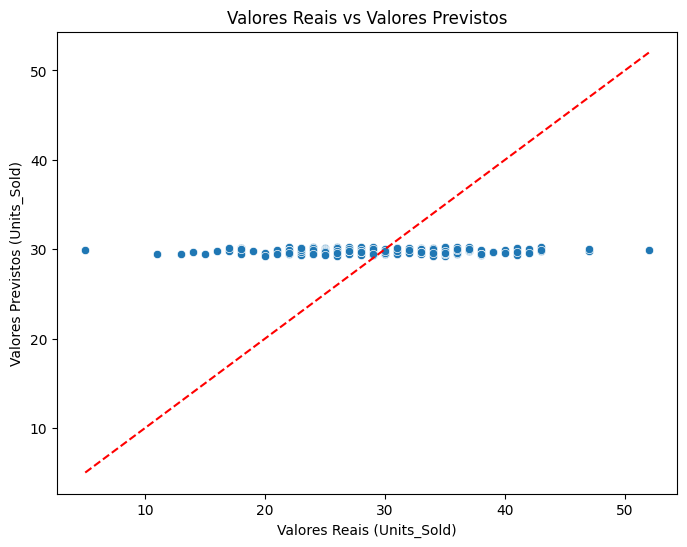

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha y=x

plt.xlabel('Valores Reais (Units_Sold)')
plt.ylabel('Valores Previstos (Units_Sold)')
plt.title('Valores Reais vs Valores Previstos')
plt.show()